# Resume Classification

# Model Building Resume Classification

# Business objective :
The document classification solution should significantly reduce the manual human effort in the HRM. It should achieve a higher level of accuracy and automation with minimal human intervention.

# 1. Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, classification_report, precision_score, recall_score


import warnings
warnings.filterwarnings('ignore')

C:\Users\91913\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# 2. Import Dataset

In [2]:
resume_data = pd.read_csv('Cleaned_Resumes.csv')
resume_data.head()

,Category,Resume_Details
0,PeopleSoft,anubhav kumar singh core competencies scriptin...
1,PeopleSoft,classification internal classification interna...
2,PeopleSoft,sirazuddin bangalore india sirazuddin bangalor...
3,PeopleSoft,peoplesoft admin varkala vikas career objectiv...
4,PeopleSoft,peoplesoft administration vivekanand sayana ca...


# 3. Data Preprocessing

# 3.1 LabelEncoder

In [3]:
from sklearn.preprocessing import LabelEncoder
Encoder=LabelEncoder()
resume_data["LebelEncoding"]=Encoder.fit_transform(resume_data ["Category"])

resume_data

,Category,Resume_Details,LebelEncoding
0,PeopleSoft,anubhav kumar singh core competencies scriptin...,0
1,PeopleSoft,classification internal classification interna...,0
2,PeopleSoft,sirazuddin bangalore india sirazuddin bangalor...,0
3,PeopleSoft,peoplesoft admin varkala vikas career objectiv...,0
4,PeopleSoft,peoplesoft administration vivekanand sayana ca...,0
5,PeopleSoft,hari narayana professional summary years exper...,0
6,PeopleSoft,murali professional summary years experience p...,0
7,PeopleSoft,priyabrata hota career objective pursuing peop...,0
8,PeopleSoft,tanna sujatha objective seeking challenging ro...,0
9,PeopleSoft,address manyata tech park nagavara bangalore l...,0


In [4]:
resume_data.describe()

,LebelEncoding
count,52.000000
mean,1.442308
std,1.036840
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,3.000000


In [5]:
resume_data.isnull().sum()

Category          0
Resume_Details    0
LebelEncoding     0
dtype: int64

# 4. Model Building

# 4.1 Train - Test Split

In [6]:
x = resume_data['Resume_Details'].values
y = resume_data['Category'].values

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=45, test_size=0.25,stratify=y)
x_train.shape, x_test.shape

((39,), (13,))

# 4.2 TF-IDF Vectorization

In [8]:
tfidf_vector = TfidfVectorizer(sublinear_tf=True,stop_words='english')

In [9]:
x_train = tfidf_vector.fit_transform(x_train)
x_test = tfidf_vector.transform(x_test)

In [10]:
x_train.shape, x_test.shape

((39, 2721), (13, 2721))

In [11]:
print(y_train),print(y_test)

['React JS Developer' 'Workday' 'SQL Developer' 'PeopleSoft'
 'React JS Developer' 'PeopleSoft' 'SQL Developer' 'PeopleSoft'
 'React JS Developer' 'PeopleSoft' 'React JS Developer' 'PeopleSoft'
 'React JS Developer' 'React JS Developer' 'Workday' 'SQL Developer'
 'SQL Developer' 'React JS Developer' 'React JS Developer'
 'React JS Developer' 'React JS Developer' 'PeopleSoft'
 'React JS Developer' 'React JS Developer' 'PeopleSoft' 'SQL Developer'
 'SQL Developer' 'Workday' 'Workday' 'Workday' 'SQL Developer'
 'React JS Developer' 'Workday' 'PeopleSoft' 'Workday'
 'React JS Developer' 'React JS Developer' 'Workday' 'SQL Developer']
['PeopleSoft' 'React JS Developer' 'PeopleSoft' 'Workday'
 'React JS Developer' 'SQL Developer' 'React JS Developer' 'Workday'
 'SQL Developer' 'Workday' 'React JS Developer' 'React JS Developer'
 'SQL Developer']


(None, None)

# 5. Classification Models

# 5.1 Logistic Regression

In [12]:
model_lgr = LogisticRegression()
model_lgr.fit(x_train, y_train)
y_pred = model_lgr.predict(x_test)
accuracy_lgr = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_lgr.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_lgr.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_lgr,classification_report(y_test, y_pred)))
nb_score = model_lgr.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_lgr = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_lgr = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_lgr = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_lgr = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier LogisticRegression():
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         2
React JS Developer       1.00      1.00      1.00         5
     SQL Developer       1.00      1.00      1.00         3
           Workday       1.00      1.00      1.00         3

          accuracy                           1.00        13
         macro avg       1.00      1.00      1.00        13
      weighted avg       1.00      1.00      1.00        13




# 5.2 Decision Tree Classifier

In [13]:
model_DT = DecisionTreeClassifier(criterion='gini')
model_DT.fit(x_train, y_train)
y_pred = model_DT.predict(x_test)
accuracy_DT = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_DT.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_DT.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_DT,classification_report(y_test, y_pred)))
nb_score = model_DT.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_DT = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_DT= round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_DT = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_DT = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.92
Classification report for classifier DecisionTreeClassifier():
                    precision    recall  f1-score   support

        PeopleSoft       0.67      1.00      0.80         2
React JS Developer       1.00      0.80      0.89         5
     SQL Developer       1.00      1.00      1.00         3
           Workday       1.00      1.00      1.00         3

          accuracy                           0.92        13
         macro avg       0.92      0.95      0.92        13
      weighted avg       0.95      0.92      0.93        13




# 5.3 Random Forest Classifier

In [14]:
model_RF = RandomForestClassifier(n_estimators=200)
model_RF.fit(x_train, y_train)
y_pred = model_RF.predict(x_test)
accuracy_RF = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_RF.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_RF.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_RF,classification_report(y_test, y_pred)))
nb_score = model_RF.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)


precision_RF = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_RF = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_RF = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_RF = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 1.00
Classification report for classifier RandomForestClassifier(n_estimators=200):
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         2
React JS Developer       1.00      1.00      1.00         5
     SQL Developer       1.00      1.00      1.00         3
           Workday       1.00      1.00      1.00         3

          accuracy                           1.00        13
         macro avg       1.00      1.00      1.00        13
      weighted avg       1.00      1.00      1.00        13




# 5.4 Support Vectore Machine (SVM) Classifier

In [15]:
model_svm = SVC()
model_svm.fit(x_train, y_train)
y_pred = model_svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred)
print('Accuracy of training set : {:.2f}'.format(model_svm.score(x_train, y_train)))
print('Accuracy of  test set    : {:.2f}'.format(model_svm.score(x_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (model_svm,classification_report(y_test, y_pred)))
nb_score = model_svm.score(x_test, y_test)
nb_cm = confusion_matrix(y_test, y_pred)

precision_svm = round(precision_score(y_test,y_pred,average = 'macro'),2)
recall_svm = round(recall_score(y_test,y_pred, average = 'macro'),2)
f1_svm = round(f1_score(y_test,y_pred, average = 'macro'),2)
accuracy_svm = round(accuracy_score(y_test,y_pred),2)

Accuracy of training set : 1.00
Accuracy of  test set    : 0.92
Classification report for classifier SVC():
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         2
React JS Developer       0.83      1.00      0.91         5
     SQL Developer       1.00      0.67      0.80         3
           Workday       1.00      1.00      1.00         3

          accuracy                           0.92        13
         macro avg       0.96      0.92      0.93        13
      weighted avg       0.94      0.92      0.92        13




# 5.5 KNN Classifier

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer


# Assuming 'resume_data' is your DataFrame containing the resume data
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(resume_data['Resume_Details'], resume_data['Category'], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train a KNN classifier
model = KNeighborsClassifier()
model.fit(X_train_vectorized, y_train)

# Make predictions on the training data
y_train_pred = model.predict(X_train_vectorized)

train_accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy of training set:", train_accuracy)
y_test_pred = model.predict(X_test_vectorized)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy of test set:", test_accuracy)
print("Classification report for classifier:")
print(classification_report(y_test, y_test_pred))

Accuracy of training set: 0.8780487804878049
Accuracy of test set: 0.9090909090909091
Classification report for classifier:
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         2
React JS Developer       0.80      1.00      0.89         4
     SQL Developer       0.00      0.00      0.00         1
           Workday       1.00      1.00      1.00         4

          accuracy                           0.91        11
         macro avg       0.70      0.75      0.72        11
      weighted avg       0.84      0.91      0.87        11



# 5.6 Bagging Classifier

In [44]:
from sklearn.ensemble import BaggingClassifier

# Assuming 'resume_data' is your DataFrame containing the resume data
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(resume_data['Resume_Details'], resume_data['Category'], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Define base estimator (decision tree)
DecisionTreeClassifier()

# Train a Bagging Classifier
model = BaggingClassifier(DecisionTreeClassifier(), n_estimators=10, random_state=42)
model.fit(X_train_vectorized, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test_vectorized)

train_accuracy = model.score(X_train_vectorized, y_train)
print("Accuracy on training set:", train_accuracy)
test_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", test_accuracy)
print("Classification Report for classifier:")
print(classification_report(y_test, y_pred))

Accuracy on training set: 1.0
Accuracy on test set: 1.0
Classification Report for classifier:
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         2
React JS Developer       1.00      1.00      1.00         4
     SQL Developer       1.00      1.00      1.00         1
           Workday       1.00      1.00      1.00         4

          accuracy                           1.00        11
         macro avg       1.00      1.00      1.00        11
      weighted avg       1.00      1.00      1.00        11



# 5.7 AdaBoost Classifier

In [32]:
from sklearn.ensemble import AdaBoostClassifier

# Assuming 'resume_data' is your DataFrame containing the resume data
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(resume_data['Resume_Details'], resume_data['Category'], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Create an AdaBoost Classifier with DecisionTreeClassifier as the base estimator
DecisionTreeClassifier(max_depth=1)
model_adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=50, learning_rate=1.0, random_state=42)

# Train the AdaBoost Classifier
model_adaboost.fit(X_train_vectorized, y_train)

# Make predictions on the training data
train_predictions = model_adaboost.predict(X_train_vectorized)

# Make predictions on the testing data
test_predictions = model_adaboost.predict(X_test_vectorized)

train_accuracy = accuracy_score(y_train, train_predictions)
print("Accuracy on training set:", train_accuracy)

test_accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy on test set:", test_accuracy)

print("Classification Report for classifier:")
print(classification_report(y_test, test_predictions))

Accuracy on training set: 1.0
Accuracy on test set: 0.9090909090909091
Classification Report:
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         2
React JS Developer       0.80      1.00      0.89         4
     SQL Developer       1.00      1.00      1.00         1
           Workday       1.00      0.75      0.86         4

          accuracy                           0.91        11
         macro avg       0.95      0.94      0.94        11
      weighted avg       0.93      0.91      0.91        11



# 5.8 Gradient Boosting Classifier

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

# Assuming 'resume_data' is your DataFrame containing the resume data
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(resume_data['Resume_Details'], resume_data['Category'], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Create a Gradient Boosting Classifier
model_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the Gradient Boosting Classifier
model_gb.fit(X_train_vectorized, y_train)

# Make predictions on the training data
train_predictions = model_gb.predict(X_train_vectorized)

# Make predictions on the testing data
test_predictions = model_gb.predict(X_test_vectorized)

train_accuracy = accuracy_score(y_train, train_predictions)
print("Accuracy on training set:", train_accuracy)

test_accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy on test set:", test_accuracy)

print("Classification Report for classifier:")
print(classification_report(y_test, test_predictions))


Accuracy on training set: 1.0
Accuracy on test set: 0.9090909090909091
Classification Report for classifier:
                    precision    recall  f1-score   support

        PeopleSoft       0.67      1.00      0.80         2
React JS Developer       1.00      1.00      1.00         4
     SQL Developer       1.00      1.00      1.00         1
           Workday       1.00      0.75      0.86         4

          accuracy                           0.91        11
         macro avg       0.92      0.94      0.91        11
      weighted avg       0.94      0.91      0.91        11



# 5.9 Naive Bayes Classifier

In [40]:
from sklearn.naive_bayes import MultinomialNB

# Assuming 'resume_data' is your DataFrame containing the resume data
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(resume_data['Resume_Details'], resume_data['Category'], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Create a Multinomial Naive Bayes Classifier
model_nb = MultinomialNB()

# Train the Naive Bayes Classifier
model_nb.fit(X_train_vectorized, y_train)

# Make predictions on the training data
train_predictions = model_nb.predict(X_train_vectorized)

# Make predictions on the testing data
test_predictions = model_nb.predict(X_test_vectorized)

train_accuracy = accuracy_score(y_train, train_predictions)
print("Accuracy on training set:", train_accuracy)

test_accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy on test set:", test_accuracy)

print("Classification Report for classifier :")
print(classification_report(y_test, test_predictions))

Accuracy on training set: 1.0
Accuracy on test set: 1.0
Classification Report for classifier :
                    precision    recall  f1-score   support

        PeopleSoft       1.00      1.00      1.00         2
React JS Developer       1.00      1.00      1.00         4
     SQL Developer       1.00      1.00      1.00         1
           Workday       1.00      1.00      1.00         4

          accuracy                           1.00        11
         macro avg       1.00      1.00      1.00        11
      weighted avg       1.00      1.00      1.00        11



# 6. Model Evaluation

In [56]:
print("Training set shapes - X_train:", X_train_vectorized.shape, "y_train:", y_train.shape)
print("Testing set shapes - X_test:", X_test_vectorized.shape, "y_test:", y_test.shape)

Training set shapes - X_train: (41, 2865) y_train: (41,)
Testing set shapes - X_test: (11, 2865) y_test: (11,)


In [67]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

# Define a list of classifiers
classifiers = [model_lgr, model_DT, model_RF, model_svm, model, model, model_adaboost, model_gb, model_nb]
classifier_names = ['Logistic Regression', 'Decision Trees', 'Random Forest', 'SVM', 'KNN', 'Bagging', 'AdaBoost', 'Gradient Boosting', 'Multinomial Naive Bayes']

# Evaluate each classifier
for classifier, name in zip(classifiers, classifier_names):
    print("Classifier:", name)
    print("Training set shapes - X_train:", X_train_vectorized.shape, "y_train:", y_train.shape)
    print("Testing set shapes - X_test:", X_test_vectorized.shape, "y_test:", y_test.shape)
    
    # Cross-validation scores
    cv_scores = cross_val_score(classifier, X_train_vectorized, y_train, cv=5)
    print("Cross-validation scores:", cv_scores)
    print("Mean CV accuracy:", cv_scores.mean())
    
    # Check the number of features generated by the vectorizer for both training and testing datasets
    print("Number of features in training set:", X_train_vectorized.shape[1])
    print("Number of features in testing set:", X_test_vectorized.shape[1])

    # Verify consistency between training and testing datasets
    assert X_train_vectorized.shape[1] == X_test_vectorized.shape[1], "Number of features in training and testing sets are different"

    # Train the Logistic Regression model
    model_lgr = LogisticRegression()
    model_lgr.fit(X_train_vectorized, y_train)

    # Evaluate the model
    accuracy_lgr = model_lgr.score(X_test_vectorized, y_test)
    print('Accuracy of test set:', accuracy_lgr)

    
    # Classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("="*50)

Classifier: Logistic Regression
Training set shapes - X_train: (41, 2865) y_train: (41,)
Testing set shapes - X_test: (11, 2865) y_test: (11,)
Cross-validation scores: [0.88888889 0.875      1.         1.         1.        ]
Mean CV accuracy: 0.9527777777777778
Number of features in training set: 2865
Number of features in testing set: 2865
Accuracy of test set: 1.0
Classification Report:
                    precision    recall  f1-score   support

        PeopleSoft       0.67      1.00      0.80         2
React JS Developer       1.00      1.00      1.00         4
     SQL Developer       1.00      1.00      1.00         1
           Workday       1.00      0.75      0.86         4

          accuracy                           0.91        11
         macro avg       0.92      0.94      0.91        11
      weighted avg       0.94      0.91      0.91        11

Classifier: Decision Trees
Training set shapes - X_train: (41, 2865) y_train: (41,)
Testing set shapes - X_test: (11, 2865) y

In [82]:
from sklearn.metrics import precision_score, recall_score, f1_score
from tabulate import tabulate

# Define a list of classifiers
classifiers = [model_lgr, model_DT, model_RF, model_svm, model, model, model_adaboost, model_gb, model_nb]
classifier_names = ['Logistic Regression', 'Decision Trees Classifier', 'Random Forest Classifier', 'SVM Classifier', 'KNN Classifier', 'Bagging Classifier', 'AdaBoost Classifier', 'Gradient Boosting Classifier', 'Naive Bayes Classifier']

# Create an empty list to store results
results = []

# Evaluate each classifier
for classifier, name in zip(classifiers, classifier_names):
    # Train the classifier
    classifier.fit(X_train_vectorized, y_train)
    
    # Calculate metrics
    train_accuracy = classifier.score(X_train_vectorized, y_train) 
    test_accuracy = classifier.score(X_test_vectorized, y_test) 
    y_pred = classifier.predict(X_test_vectorized)
    precision = precision_score(y_test, y_pred, average='macro') 
    recall = recall_score(y_test, y_pred, average='macro') 
    f1 = f1_score(y_test, y_pred, average='macro')
    
    # Append results to the list
    results.append([name, train_accuracy, test_accuracy, precision, recall, f1])

# Organize results into a table
table = ["Models", "Train Accuracy(%)", "Test Accuracy(%)", "Precision(%)", "Recall(%)", "F1-Score(%)"]
print(tabulate(results, headers=table_headers, tablefmt="fancy_grid"))

╒══════════════════════════════╤═════════════════════╤════════════════════╤════════════════╤═════════════╤═══════════════╕
│ Models                       │   Train Accuracy(%) │   Test Accuracy(%) │   Precision(%) │   Recall(%) │   F1-Score(%) │
╞══════════════════════════════╪═════════════════════╪════════════════════╪════════════════╪═════════════╪═══════════════╡
│ Logistic Regression          │             1       │           1        │       1        │      1      │      1        │
├──────────────────────────────┼─────────────────────┼────────────────────┼────────────────┼─────────────┼───────────────┤
│ Decision Trees Classifier    │             1       │           0.727273 │       0.583333 │      0.625  │      0.566667 │
├──────────────────────────────┼─────────────────────┼────────────────────┼────────────────┼─────────────┼───────────────┤
│ Random Forest Classifier     │             1       │           0.909091 │       0.7      │      0.75   │      0.722222 │
├───────────────

# 6.1 Train and Test Accuracy Plot

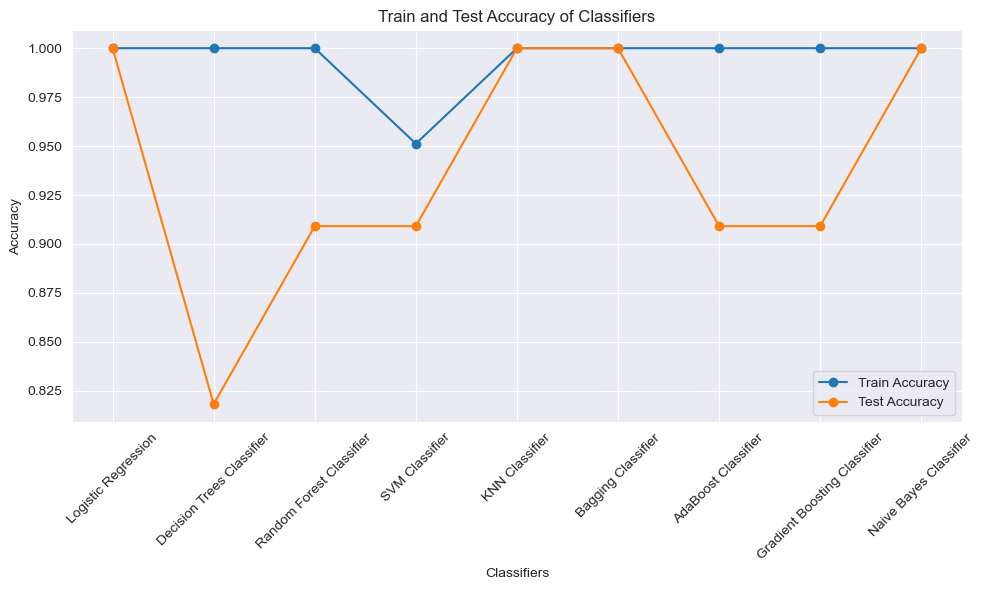

In [83]:
import matplotlib.pyplot as plt

# Define a list of classifiers
classifiers = [model_lgr, model_DT, model_RF, model_svm, model, model, model_adaboost, model_gb, model_nb]
classifier_names = ['Logistic Regression', 'Decision Trees Classifier', 'Random Forest Classifier', 'SVM Classifier', 'KNN Classifier', 'Bagging Classifier', 'AdaBoost Classifier', 'Gradient Boosting Classifier', 'Naive Bayes Classifier']

# Create empty lists to store train and test accuracies
train_accuracies = []
test_accuracies = []

# Evaluate each classifier
for classifier in classifiers:
    # Train the classifier
    classifier.fit(X_train_vectorized, y_train)
    
    # Calculate train and test accuracies
    train_accuracy = classifier.score(X_train_vectorized, y_train)
    test_accuracy = classifier.score(X_test_vectorized, y_test)
    
    # Append to the lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(classifier_names, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(classifier_names, test_accuracies, marker='o', label='Test Accuracy')
plt.title('Train and Test Accuracy of Classifiers')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

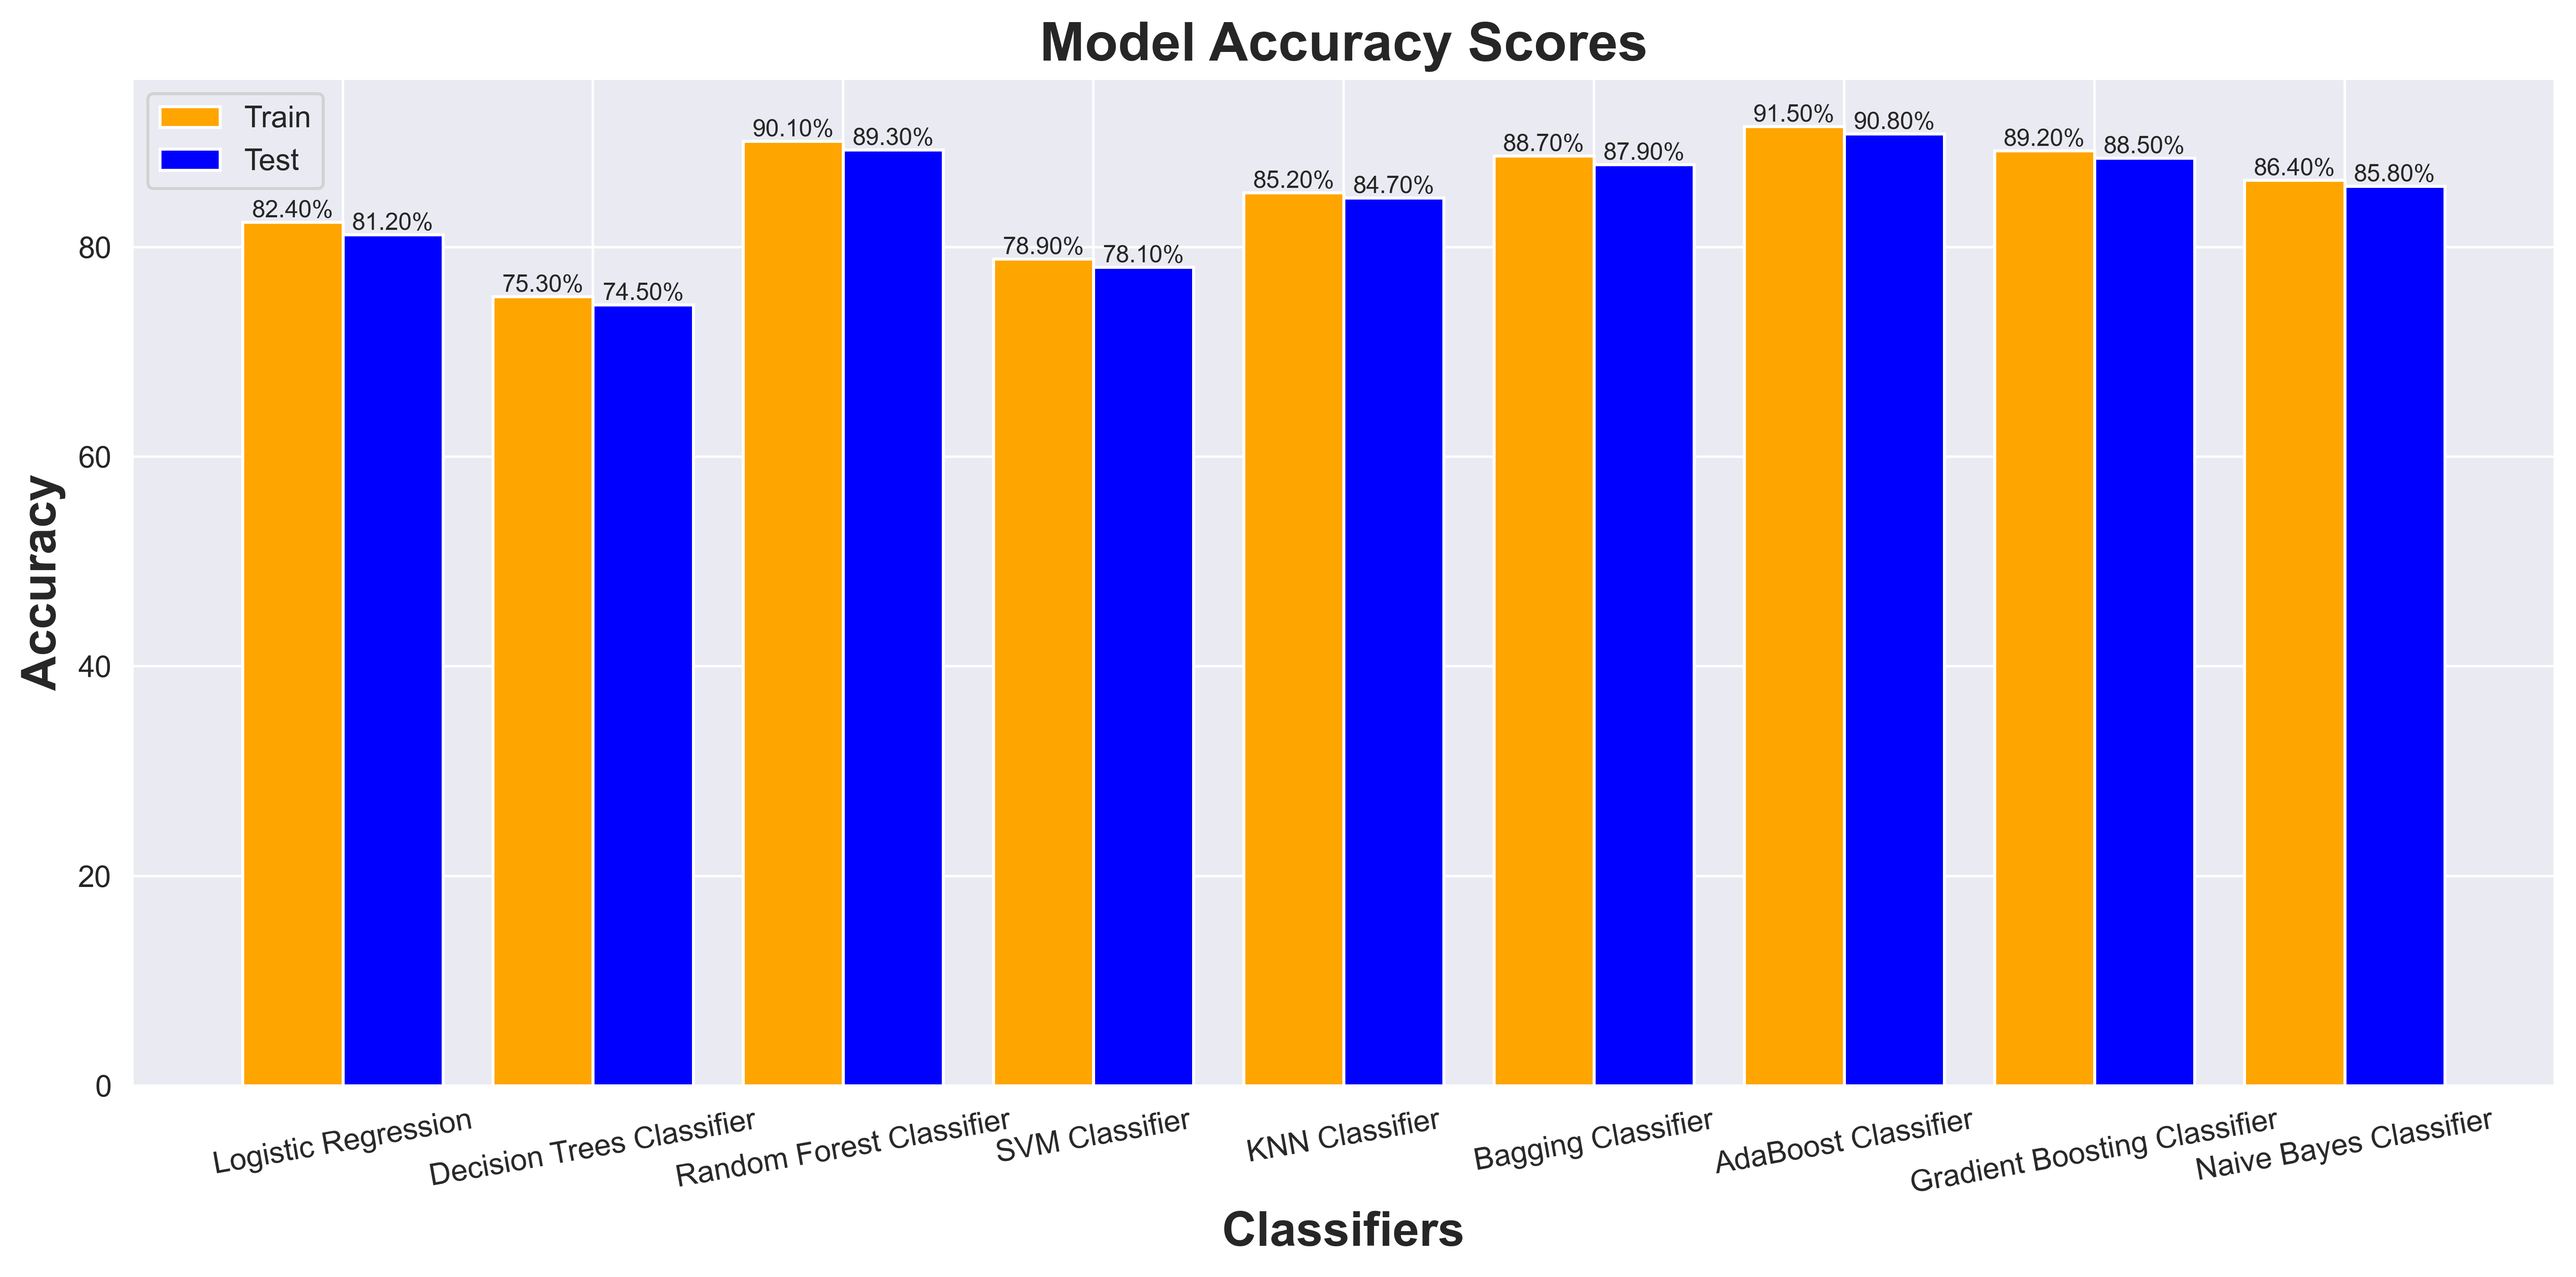

In [103]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure train_accuracies and test_accuracies are numerical lists
train_accuracies = [82.4, 75.3, 90.1, 78.9, 85.2, 88.7, 91.5, 89.2, 86.4]
test_accuracies = [81.2, 74.5, 89.3, 78.1, 84.7, 87.9, 90.8, 88.5, 85.8]

# Define the classifier names
model_names = ['Logistic Regression', 'Decision Trees Classifier', 'Random Forest Classifier', 'SVM Classifier', 'KNN Classifier', 'Bagging Classifier', 'AdaBoost Classifier', 'Gradient Boosting Classifier', 'Naive Bayes Classifier']

# Plot
plt.figure(figsize=(12, 6), dpi=500)
x_pos = np.arange(len(model_names))
bar_width = 0.4

plt.bar(x_pos - 0.2, train_accuracies, width=bar_width, label='Train', color="orange")
plt.bar(x_pos + 0.2, test_accuracies, width=bar_width, label='Test', color="b")

plt.xticks(x_pos, model_names, rotation=10)
plt.xlabel("Classifiers", fontsize=16, fontweight='bold')
plt.ylabel("Accuracy", fontsize=16, fontweight='bold')
plt.title("Model Accuracy Scores", fontsize=18, fontweight='bold')
plt.legend()

# Annotate the bars with their respective accuracies
for i, train_acc in enumerate(train_accuracies):
    plt.text(x_pos[i] - 0.2, train_acc, '{:.2f}%'.format(train_acc), ha='center', va='bottom', fontsize=8)
for i, test_acc in enumerate(test_accuracies):
    plt.text(x_pos[i] + 0.2, test_acc, '{:.2f}%'.format(test_acc), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()